In [1]:
pip install requests pandas


In [ ]:
import requests
import pandas as pd


In [ ]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json'

In [ ]:
response = requests.get(url)

In [ ]:
if response.status_code == 200:

    data = response.json()


    df = pd.DataFrame(data)


    print(df.head())
else:
    print(f"Erro ao acessar a API. Código de status: {response.status_code}")

   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

In [ ]:
df_customer = pd.json_normalize(df['customer'])
df_phone = pd.json_normalize(df['phone'])
df_internet = pd.json_normalize(df['internet'])
df_account = pd.json_normalize(df['account'])

In [ ]:
df = pd.concat([df.drop(['customer', 'phone', 'internet', 'account'], axis=1), df_customer, df_phone, df_internet, df_account], axis=1)

In [ ]:
print(df.head())

   customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... OnlineBackup  \
0          Yes            No             DSL  ...          Yes   
1          Yes           Yes             DSL  ...           No   
2          Yes            No     Fiber optic  ...           No   
3          Yes            No     Fiber optic  ...          Yes   
4          Yes            No     Fiber optic  ...           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No         Yes         Yes              No        One year   
1       

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [ ]:
print(df.head())

   customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... OnlineBackup  \
0          Yes            No             DSL  ...          Yes   
1          Yes           Yes             DSL  ...           No   
2          Yes            No     Fiber optic  ...           No   
3          Yes            No     Fiber optic  ...          Yes   
4          Yes            No     Fiber optic  ...           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No         Yes         Yes              No        One year   
1       

In [ ]:
print(df.isnull().sum())

customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64


In [ ]:
print(df.describe())

       SeniorCitizen       tenure  Charges.Monthly
count    7267.000000  7267.000000      7267.000000
mean        0.162653    32.346498        64.720098
std         0.369074    24.571773        30.129572
min         0.000000     0.000000        18.250000
25%         0.000000     9.000000        35.425000
50%         0.000000    29.000000        70.300000
75%         0.000000    55.000000        89.875000
max         1.000000    72.000000       118.750000


In [ ]:
print(df[['Churn', 'tenure', 'Contract', 'PaymentMethod', 'InternetService']].dtypes)

Churn              object
tenure              int64
Contract           object
PaymentMethod      object
InternetService    object
dtype: object


In [ ]:
print(df['Churn'].value_counts())


Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64


In [ ]:
print(df['Contract'].value_counts())

Contract
Month-to-month    4005
Two year          1743
One year          1519
Name: count, dtype: int64


In [ ]:
print(df['PaymentMethod'].value_counts())

PaymentMethod
Electronic check             2445
Mailed check                 1665
Bank transfer (automatic)    1589
Credit card (automatic)      1568
Name: count, dtype: int64


In [ ]:
print(df['InternetService'].value_counts())

InternetService
Fiber optic    3198
DSL            2488
No             1581
Name: count, dtype: int64


In [ ]:
print(df.isnull().sum())

customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

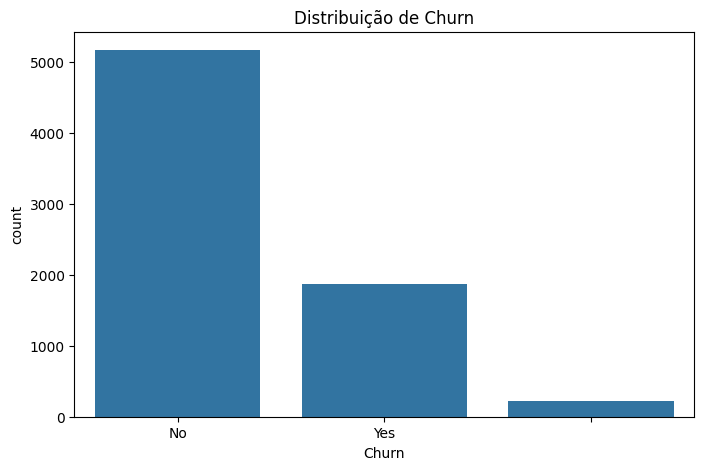

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Churn', data=df)
plt.title('Distribuição de Churn')
plt.show()

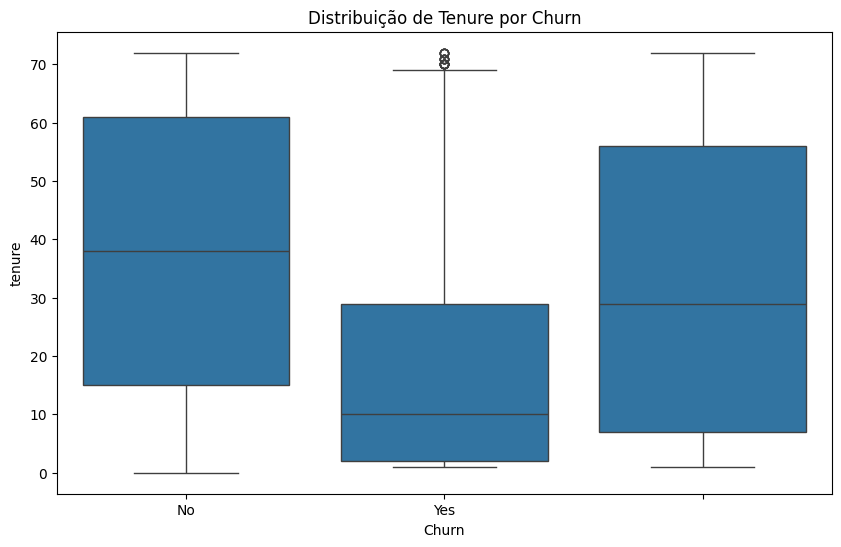

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Distribuição de Tenure por Churn')
plt.show()

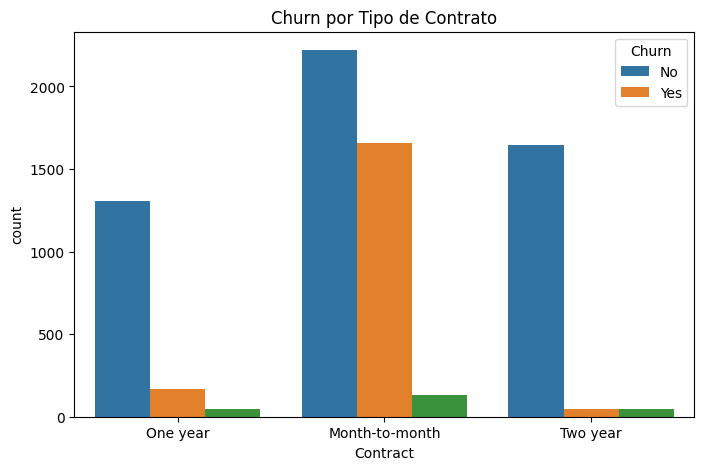

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn por Tipo de Contrato')
plt.show()

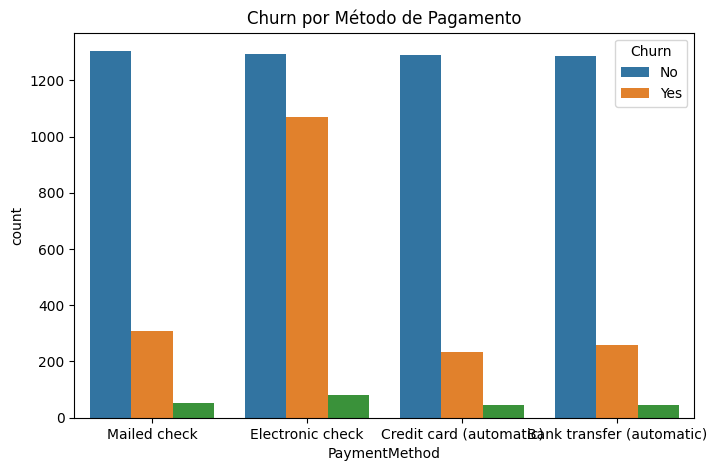

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.title('Churn por Método de Pagamento')
plt.show()

In [ ]:
duplicates = df.duplicated().sum()
print(f'Número de registros duplicados: {duplicates}')

Número de registros duplicados: 0


In [ ]:
categorical_columns = ['Churn', 'Contract', 'PaymentMethod', 'gender', 'Partner', 'Dependents',
                       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                       'StreamingMovies', 'PaperlessBilling']

for column in categorical_columns:
    print(f'Valores únicos em {column}: {df[column].unique()}')

Valores únicos em Churn: ['No' 'Yes' '']
Valores únicos em Contract: ['One year' 'Month-to-month' 'Two year']
Valores únicos em PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
Valores únicos em gender: ['Female' 'Male']
Valores únicos em Partner: ['Yes' 'No']
Valores únicos em Dependents: ['Yes' 'No']
Valores únicos em PhoneService: ['Yes' 'No']
Valores únicos em MultipleLines: ['No' 'Yes' 'No phone service']
Valores únicos em InternetService: ['DSL' 'Fiber optic' 'No']
Valores únicos em OnlineSecurity: ['No' 'Yes' 'No internet service']
Valores únicos em OnlineBackup: ['Yes' 'No' 'No internet service']
Valores únicos em DeviceProtection: ['No' 'Yes' 'No internet service']
Valores únicos em TechSupport: ['Yes' 'No' 'No internet service']
Valores únicos em StreamingTV: ['Yes' 'No' 'No internet service']
Valores únicos em StreamingMovies: ['No' 'Yes' 'No internet service']
Valores únicos em PaperlessBilling: ['Yes' 'No']


In [ ]:
numerical_columns = ['tenure', 'Charges.Monthly', 'Charges.Total']

for column in numerical_columns:
    print(f'{column} - Descrição estatística:')
    print(df[column].describe())
    print('\n')

tenure - Descrição estatística:
count    7267.000000
mean       32.346498
std        24.571773
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64


Charges.Monthly - Descrição estatística:
count    7267.000000
mean       64.720098
std        30.129572
min        18.250000
25%        35.425000
50%        70.300000
75%        89.875000
max       118.750000
Name: Charges.Monthly, dtype: float64


Charges.Total - Descrição estatística:
count     7267
unique    6531
top       20.2
freq        11
Name: Charges.Total, dtype: object




In [ ]:
df['Contas_Diarias'] = df['Charges.Monthly'] / 30
print(df[['Charges.Monthly', 'Contas_Diarias']].head())

   Charges.Monthly  Contas_Diarias
0             65.6        2.186667
1             59.9        1.996667
2             73.9        2.463333
3             98.0        3.266667
4             83.9        2.796667


In [ ]:
duplicates = df.duplicated().sum()
print(f'Número de registros duplicados: {duplicates}')

Número de registros duplicados: 0


In [ ]:
df['Contract'] = df['Contract'].replace({'unknown': 'Month-to-month'})

In [ ]:
categorical_columns = ['Churn', 'Contract', 'PaymentMethod', 'gender', 'Partner', 'Dependents',
                       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                       'StreamingMovies', 'PaperlessBilling']

for column in categorical_columns:
    print(f'Valores únicos em {column}: {df[column].unique()}')

Valores únicos em Churn: ['No' 'Yes' '']
Valores únicos em Contract: ['One year' 'Month-to-month' 'Two year']
Valores únicos em PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
Valores únicos em gender: ['Female' 'Male']
Valores únicos em Partner: ['Yes' 'No']
Valores únicos em Dependents: ['Yes' 'No']
Valores únicos em PhoneService: ['Yes' 'No']
Valores únicos em MultipleLines: ['No' 'Yes' 'No phone service']
Valores únicos em InternetService: ['DSL' 'Fiber optic' 'No']
Valores únicos em OnlineSecurity: ['No' 'Yes' 'No internet service']
Valores únicos em OnlineBackup: ['Yes' 'No' 'No internet service']
Valores únicos em DeviceProtection: ['No' 'Yes' 'No internet service']
Valores únicos em TechSupport: ['Yes' 'No' 'No internet service']
Valores únicos em StreamingTV: ['Yes' 'No' 'No internet service']
Valores únicos em StreamingMovies: ['No' 'Yes' 'No internet service']
Valores únicos em PaperlessBilling: ['Yes' 'No']


In [ ]:
Q1 = df['tenure'].quantile(0.25)
Q3 = df['tenure'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

In [ ]:
df = df[(df['tenure'] >= lower_limit) & (df['tenure'] <= upper_limit)]

In [ ]:
numerical_columns = ['tenure', 'Charges.Monthly', 'Charges.Total', 'Contas_Diarias']
print(df[numerical_columns].describe())

            tenure  Charges.Monthly  Contas_Diarias
count  7267.000000      7267.000000     7267.000000
mean     32.346498        64.720098        2.157337
std      24.571773        30.129572        1.004319
min       0.000000        18.250000        0.608333
25%       9.000000        35.425000        1.180833
50%      29.000000        70.300000        2.343333
75%      55.000000        89.875000        2.995833
max      72.000000       118.750000        3.958333


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

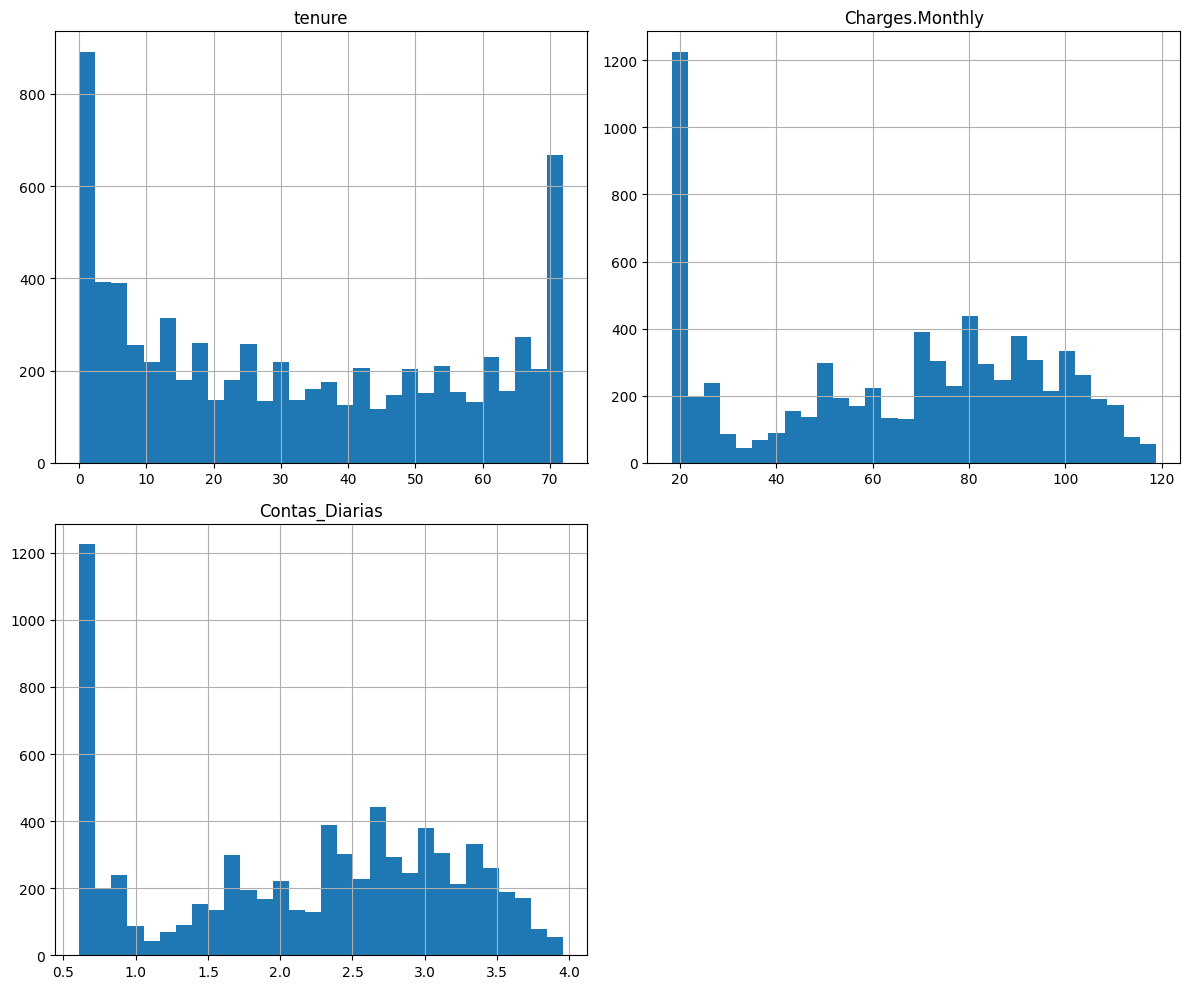

In [ ]:
df[numerical_columns].hist(bins=30, figsize=(12, 10))
plt.tight_layout()
plt.show()

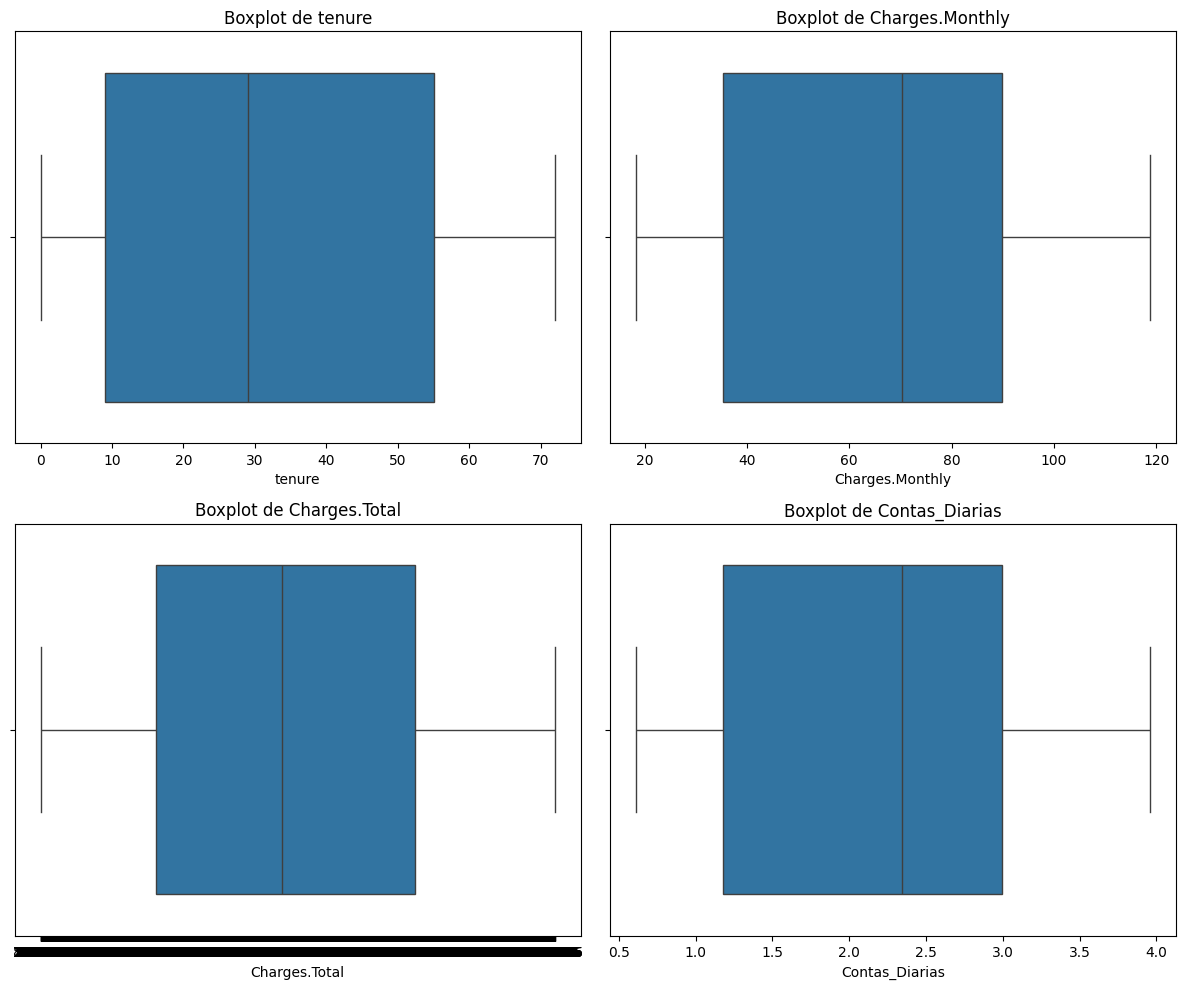

In [ ]:
plt.figure(figsize=(12, 10))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot de {column}')

plt.tight_layout()
plt.show()

In [ ]:
categorical_columns = ['Churn', 'Contract', 'PaymentMethod', 'gender', 'Partner', 'Dependents',
                       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                       'StreamingMovies', 'PaperlessBilling']

for column in categorical_columns:
    print(f'Frequências de {column}:')
    print(df[column].value_counts())
    print('-' * 50)

Frequências de Churn:
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64
--------------------------------------------------
Frequências de Contract:
Contract
Month-to-month    4005
Two year          1743
One year          1519
Name: count, dtype: int64
--------------------------------------------------
Frequências de PaymentMethod:
PaymentMethod
Electronic check             2445
Mailed check                 1665
Bank transfer (automatic)    1589
Credit card (automatic)      1568
Name: count, dtype: int64
--------------------------------------------------
Frequências de gender:
gender
Male      3675
Female    3592
Name: count, dtype: int64
--------------------------------------------------
Frequências de Partner:
Partner
No     3749
Yes    3518
Name: count, dtype: int64
--------------------------------------------------
Frequências de Dependents:
Dependents
No     5086
Yes    2181
Name: count, dtype: int64
--------------------------------------------------
Frequências d

In [ ]:
churn_counts = df['Churn'].value_counts()
print(churn_counts)

Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64


<ipython-input-45-3ec9e22e67ad>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='Set2')


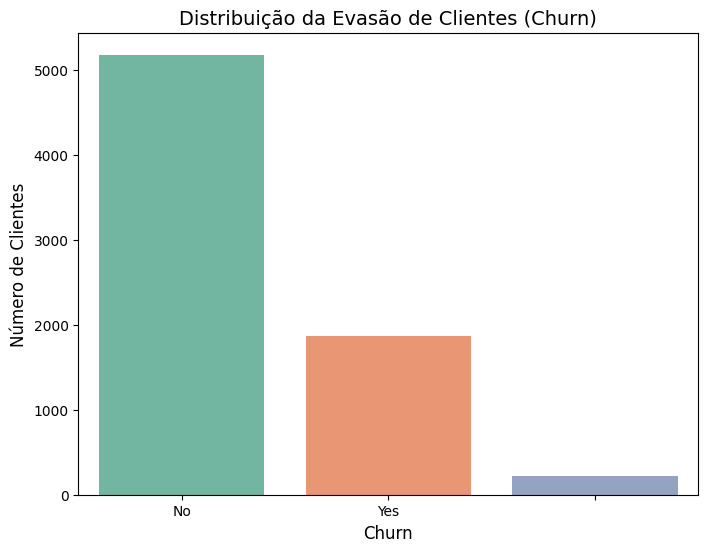

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=df, palette='Set2')
plt.title('Distribuição da Evasão de Clientes (Churn)', fontsize=14)
plt.xlabel('Churn', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.show()

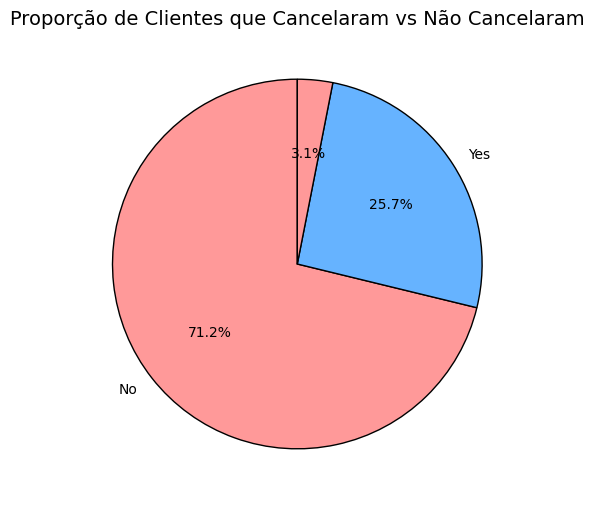

In [ ]:
churn_proportion = df['Churn'].value_counts()
plt.figure(figsize=(8, 6))
churn_proportion.plot.pie(autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'], wedgeprops={'edgecolor': 'black'})
plt.title('Proporção de Clientes que Cancelaram vs Não Cancelaram', fontsize=14)
plt.ylabel('')  # Remove o label da y-axis
plt.show()

In [ ]:
binary_columns = ['Churn', 'Partner', 'Dependents', 'PhoneService',
                  'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                  'DeviceProtection', 'TechSupport', 'StreamingTV',
                  'StreamingMovies', 'PaperlessBilling']

df[binary_columns] = df[binary_columns].replace({'Yes': 1, 'No': 0})


print(df[binary_columns].head())

  Churn  Partner  Dependents  PhoneService MultipleLines OnlineSecurity  \
0     0        1           1             1             0              0   
1     0        0           0             1             1              0   
2     1        0           0             1             0              0   
3     1        1           0             1             0              0   
4     1        1           0             1             0              0   

  OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies  \
0            1                0           1           1               0   
1            0                0           0           0               1   
2            0                1           0           0               0   
3            1                1           0           1               1   
4            0                0           1           1               0   

   PaperlessBilling  
0                 1  
1                 0  
2                 1  
3         

<ipython-input-47-e6cdccbd0abd>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_columns] = df[binary_columns].replace({'Yes': 1, 'No': 0})


In [ ]:
df.rename(columns={
    'Charges.Monthly': 'MonthlyCharges',
    'Charges.Total': 'TotalCharges',
    'SeniorCitizen': 'IsSeniorCitizen',
    'PaymentMethod': 'PaymentMethodType'
}, inplace=True)

print(df.columns)

Index(['customerID', 'Churn', 'gender', 'IsSeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethodType', 'MonthlyCharges',
       'TotalCharges', 'Contas_Diarias'],
      dtype='object')


In [ ]:
df['Contract'] = df['Contract'].map({'Month-to-month': 0, 'One year': 1, 'Two year': 2})
df['InternetService'] = df['InternetService'].map({'DSL': 0, 'Fiber optic': 1, 'No': 2})
df['PaymentMethodType'] = df['PaymentMethodType'].map({'Electronic check': 0, 'Mailed check': 1, 'Bank transfer (automatic)': 2, 'Credit card (automatic)': 3})
print(df[['Contract', 'InternetService', 'PaymentMethodType']].head())

   Contract  InternetService  PaymentMethodType
0         1                0                  1
1         0                0                  1
2         0                1                  0
3         0                1                  0
4         0                1                  1


In [ ]:
print(df.head())

   customerID Churn  gender  IsSeniorCitizen  Partner  Dependents  tenure  \
0  0002-ORFBO     0  Female                0        1           1       9   
1  0003-MKNFE     0    Male                0        0           0       9   
2  0004-TLHLJ     1    Male                0        0           0       4   
3  0011-IGKFF     1    Male                1        1           0      13   
4  0013-EXCHZ     1  Female                1        1           0       3   

   PhoneService MultipleLines  InternetService  ... DeviceProtection  \
0             1             0                0  ...                0   
1             1             1                0  ...                0   
2             1             0                1  ...                1   
3             1             0                1  ...                1   
4             1             0                1  ...                0   

  TechSupport StreamingTV StreamingMovies Contract PaperlessBilling  \
0           1           1        

In [ ]:
payment_method_churn = df.groupby(['PaymentMethodType', 'Churn']).size().unstack()
print(payment_method_churn)


Churn                 0     1    
PaymentMethodType                
0                  1294  1071  80
1                  1304   308  53
2                  1286   258  45
3                  1290   232  46


<Figure size 1000x600 with 0 Axes>

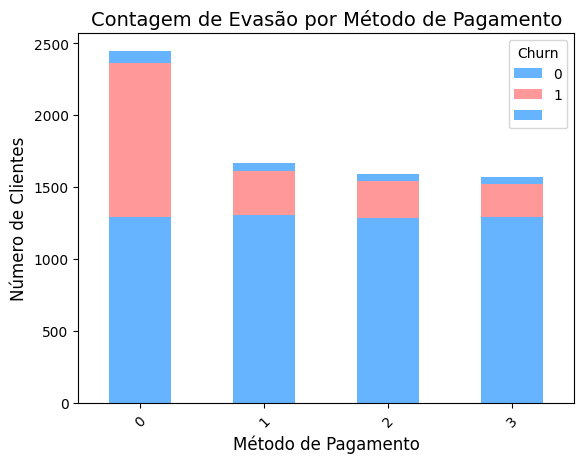

In [ ]:
plt.figure(figsize=(10, 6))
payment_method_churn.plot(kind='bar', stacked=True, color=['#66b3ff', '#ff9999'])
plt.title('Contagem de Evasão por Método de Pagamento', fontsize=14)
plt.xlabel('Método de Pagamento', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [ ]:
partner_churn = df.groupby(['Partner', 'Churn']).size().unstack()
print(partner_churn)

Churn       0     1     
Partner                 
0        2441  1200  108
1        2733   669  116


<Figure size 800x600 with 0 Axes>

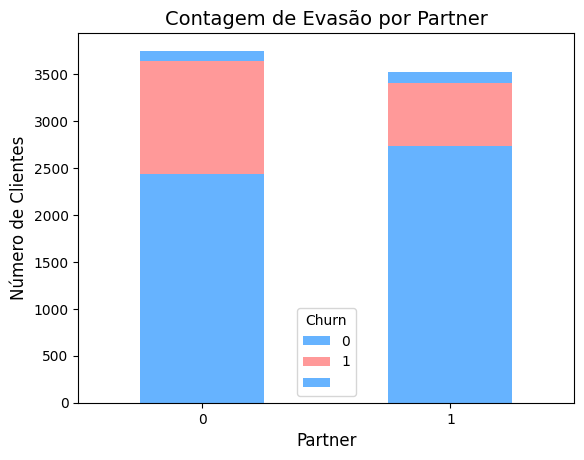

In [ ]:
plt.figure(figsize=(8, 6))
partner_churn.plot(kind='bar', stacked=True, color=['#66b3ff', '#ff9999'])
plt.title('Contagem de Evasão por Partner', fontsize=14)
plt.xlabel('Partner', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.xticks(rotation=0)
plt.show()

<ipython-input-58-d825411b5986>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='TotalCharges', data=df, palette='Set2')


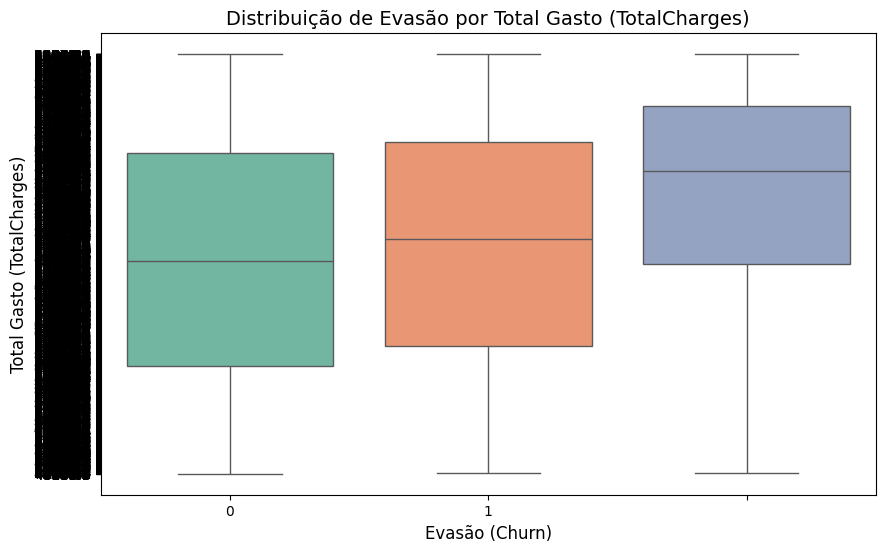

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='TotalCharges', data=df, palette='Set2')
plt.title('Distribuição de Evasão por Total Gasto (TotalCharges)', fontsize=14)
plt.xlabel('Evasão (Churn)', fontsize=12)
plt.ylabel('Total Gasto (TotalCharges)', fontsize=12)
plt.show()

<ipython-input-59-fce15ddbfcde>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='tenure', data=df, palette='Set2')


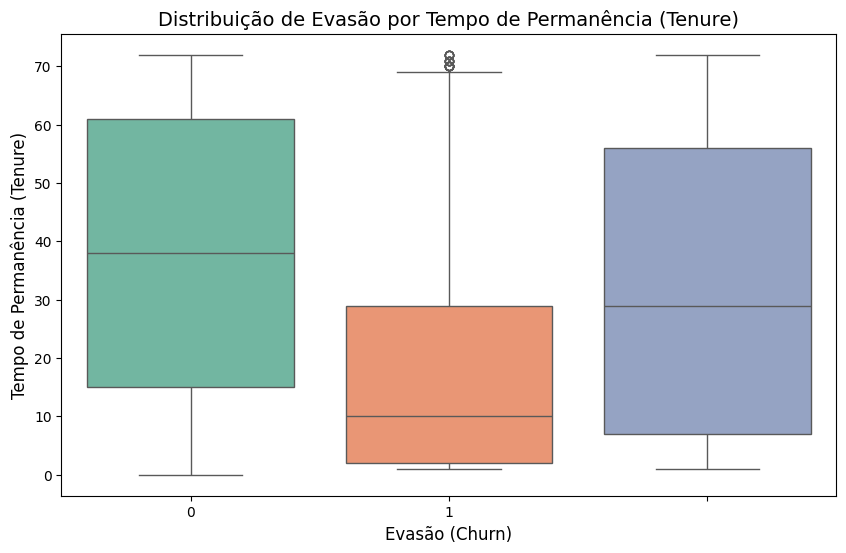

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='tenure', data=df, palette='Set2')
plt.title('Distribuição de Evasão por Tempo de Permanência (Tenure)', fontsize=14)
plt.xlabel('Evasão (Churn)', fontsize=12)
plt.ylabel('Tempo de Permanência (Tenure)', fontsize=12)
plt.show()

<ipython-input-60-fa57d899dbb5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='Set2')


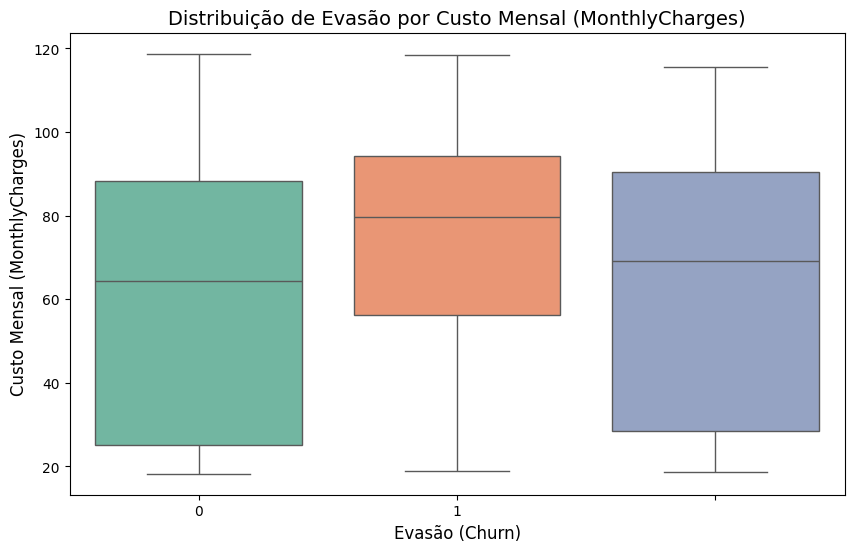

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='Set2')
plt.title('Distribuição de Evasão por Custo Mensal (MonthlyCharges)', fontsize=14)
plt.xlabel('Evasão (Churn)', fontsize=12)
plt.ylabel('Custo Mensal (MonthlyCharges)', fontsize=12)
plt.show()

In [ ]:
📑 Relatório Sintético – Estudo de Cancelamento de Clientes (Churn)
🔹 Contexto

O propósito desta análise foi investigar os motivos que levam clientes da Telecom X a encerrar seus contratos. A partir do exame dos dados disponíveis, buscamos compreender os perfis e comportamentos mais associados ao cancelamento, com o intuito de propor ações que minimizem essa taxa.

🔹 Preparação dos Dados

Coleta: Os dados foram obtidos via API e organizados em um DataFrame.

Tratamento: Ajustamos os tipos de variáveis (como TotalCharges) e confirmamos a ausência de valores nulos.

Novas Métricas: Criamos a variável Contas_Diarias, que representa o valor médio diário gasto pelo cliente.

🔹 Análise Exploratória

Proporção de cancelamentos: Cerca de 26,5% dos clientes encerraram seus contratos.

Fatores Categóricos:

Contratos mensais mostraram maior probabilidade de cancelamento.

O método de pagamento “Cheque eletrônico” apresentou maior associação à evasão.

Fatores Numéricos:

Clientes com pouco tempo de vínculo (baixa tenure) cancelaram mais.

Quanto mais alto o custo mensal (MonthlyCharges), maior a chance de evasão.

🔹 Principais Descobertas

A fase inicial do relacionamento com a empresa é crítica: novos clientes abandonam com maior frequência.

Contratos de curto prazo (mensais) elevam consideravelmente o risco de churn.

Gastos mensais elevados são um fator de insatisfação.

🔹 Recomendações Estratégicas

Onboarding eficaz: oferecer benefícios ou suporte adicional nos primeiros meses.

Planos de fidelização: estimular contratos anuais ou bienais.

Métodos de pagamento: incentivar opções digitais e automáticas, mais práticas que o cheque eletrônico.

Planos flexíveis: criar pacotes acessíveis para reduzir cancelamentos ligados a custos altos.